In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import os
import shutil
os.makedirs("/content/data/cats", exist_ok=True)
os.makedirs("/content/data/dogs", exist_ok=True)
for filename in os.listdir("/content/cat_dog_data/data/cats"):
    if filename.endswith(".jpg"):
        shutil.move(f"/content/cat_dog_data/data/cats/{filename}", f"/content/data/cats/{filename}")
for filename in os.listdir("/content/cat_dog_data/data/dogs"):
    if filename.endswith(".jpg"):
        shutil.move(f"/content/cat_dog_data/data/dogs/{filename}", f"/content/data/dogs/{filename}")


In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
train_ds = image_dataset_from_directory(
    directory="/content/data",
    labels="inferred",
    label_mode="binary",
    image_size=(128, 128),
    batch_size=32
)

train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
for images, labels in train_ds.take(1):
    print(images.shape)
    print(labels[:5])



Found 1000 files belonging to 2 classes.
(32, 128, 128, 3)
tf.Tensor(
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]], shape=(5, 1), dtype=float32)


In [ ]:
len(train_ds)


32

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
val_size = int(0.2 * len(train_ds))
train_ds_final = train_ds.skip(val_size)
val_ds = train_ds.take(val_size)


In [ ]:
train_ds_final = train_ds_final.shuffle(1000)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_ds_final,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.4951 - loss: 0.7210 - val_accuracy: 0.5573 - val_loss: 0.6825
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 26s 946ms/step - accuracy: 0.5172 - loss: 0.6850 - val_accuracy: 0.6615 - val_loss: 0.6324
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 25s 948ms/step - accuracy: 0.6529 - loss: 0.6372 - val_accuracy: 0.6979 - val_loss: 0.6090
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 26s 959ms/step - accuracy: 0.6964 - loss: 0.6021 - val_accuracy: 0.6458 - val_loss: 0.6500
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 26s 987ms/step - accuracy: 0.6820 - loss: 0.6009 - val_accuracy: 0.6719 - val_loss: 0.6203
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 39s 887ms/step - accuracy: 0.7510 - loss: 0.5398 - val_accuracy: 0.7656 - val_loss: 0.5229
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 42s 943ms/step - accuracy: 0.8058 - loss: 0.4645 - val_accuracy: 0.6875 - val_loss: 0.5929
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 26s 968ms/step - accuracy: 0.7793 - loss: 0.4818 - val_accurac

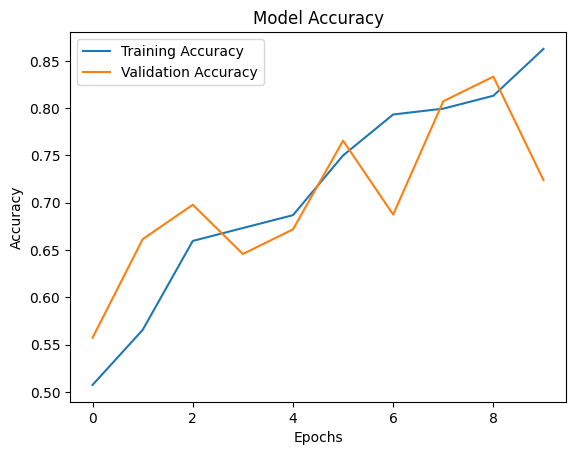

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
import tensorflow as tf
img_path = '/content/cat_dog_data/dog.JPG.jpg'
img = image.load_img('/content/cat_dog_data/dog.JPG', target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = tf.expand_dims(img_array, axis=0)


In [ ]:
prediction = model.predict(img_array)
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
[[0.70804423]]


In [ ]:
if prediction < 0.5:
    print("It's a cat!")
else:
    print("It's a dog!")


It's a dog!


In [ ]:

test_image_dir = '/content/cat_dog_data'
results = []

for filename in os.listdir(test_image_dir):
    if filename.endswith(".jpg"):
        img_path = os.path.join(test_image_dir, filename)
        img = image.load_img(img_path, target_size=(128, 128))
        img_array = image.img_to_array(img) / 255.0
        img_array = tf.expand_dims(img_array, axis=0)
        prediction = model.predict(img_array)
        label = 'dog' if prediction >= 0.5 else 'cat'
        results.append([filename, label])
with open('submission.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['filename', 'prediction'])
    writer.writerows(results)
